<a href="https://colab.research.google.com/github/marayyy/Machine-Learning-Projects/blob/Guvi/Boston_Housing_Dataset_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Dataset Prediction

Boston Housing Dataset
Predicting Median value of owner-occupied homes
The aim of this assignment is to learn the application of machine learning algorithms to data sets. This involves learning what data means, how to handle data, training, cross validation, prediction, testing your model, etc.
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
The dataset is small in size with only 506 cases. It can be used to predict the median value of a home, which is done here. There are 14 attributes in each case of the dataset.

They are:
1.	CRIM - per capita crime rate by town
2.	ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3.	INDUS - proportion of non-retail business acres per town.
4.	CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5.	NOX - nitric oxides concentration (parts per 10 million)
6.	RM - average number of rooms per dwelling
7.	AGE - proportion of owner-occupied units built prior to 1940
8.	DIS - weighted distances to five Boston employment centres
9.	RAD - index of accessibility to radial highways
10.	TAX - full-value property-tax rate per $10,000
11.	PTRATIO - pupil-teacher ratio by town
12.	B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13.	LSTAT - % lower status of the population
14.	MEDV - Median value of owner-occupied homes in $1000's

# Aim

●	To implement a linear regression with regularization via gradient descent.


●	to implement gradient descent with Lp norm, for 3 different values of p in (1,2]

●	To contrast the difference between performance of linear regression Lp norm and L2 norm for these 3 different values.

●	Tally that the gradient descent for L2 gives same result as matrix inversion based solution.
All the code is written in a single python file. The python program accepts the data directory path as input where the train and test csv files reside. Note that the data directory will contain two files train.csv used to train your model and test.csv for which the output predictions are to be made. The output predictions get written to a file named output.csv. The output.csv file should have two comma separated columns [ID,Output].

# Working of Code


●	NumPy library would be required, so code begins by importing it

●	Import phi and phi_test from train and test datasets using NumPy's loadtxt function

●	Import y from train dataset using the loadtxt function

●	Concatenate coloumn of 1s to right of phi and phi_test

●	Apply min max scaling on each coloumn of phi and phi_test

●	Apply log scaling on y

●	Define a function to calculate change in error function based on phi, w and p norm

●	Make a dictionary containing filenames as keys and p as values

●	For each item in this dictionary

o	Set the w to all 0s

o	Set an appropriate value for lambda and step size

o	Calculate new value of w

o	Repeat steps until error between consecutive ws is less than threshold

o	Load values of id from test data file

o	Calculate y for test data using phi test and applying inverse log

o	Save the ids and y according to filename from dictionary

# Feature Engineering

●	Columns of phi are not in same range, this is because their units are different i.e phi is ill conditioned

●	So, min max scaling for each column is applied to bring them in range 0-1

●	Same scaling would be required on columns of phi test

●	Log scaling was used on y. This was determined by trial and error
Comparison of performance
(p1=1.75, p2=1.5, p3=1.3)

●	As p decreases error in y decreases

●	As p decreases norm of w increases but this can be taken care by increasing lambda

●	As p decreases number of iterations required decreases
Tuning of Hyperparameter

●	If p is fixed and lambda is increased error decreases up to a certain lambda, then it starts rising

●	So, lambda was tuned by trial and error.

●	Starting with 0, lambda was increased in small steps until a minimum error was achieved.
Comparison of L2 gradient descent and closed form

●	Error from L2 Gradient descent were 4.43268 and that from closed form solution was 4.52624.

●	Errors are comparable so, the L2 gradient descent performs closely with closed form solution.

In [6]:
# Import Essential Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sb

# Setting Seaborn Style
sb.set(style = 'whitegrid')

# For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For Preformance metrics
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Initializing column names
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loading Boston Housing Dataset
boston = pd.read_csv('/content/housing.csv', delimiter=r"\s+", names = columns)
# Top 5 rows of the boston dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Boston housing Price Prediction Dataset has")
print("\t\tNumber of Factors : \t", boston.shape[1] - 1)
print("\t\tNumber of Samples : \t", boston.shape[0])

The Boston housing Price Prediction Dataset has
		Number of Factors : 	 13
		Number of Samples : 	 506


# Exploratory Data Analysis

Let's Explore more on the data

In [12]:
# TODO : Descriptive Statistics on Boston Housing Dataset
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# TODO : Check for null values and visualizing it using heatmap
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

there is no null values in any of the column

In [17]:
# TODO : Let's check for data types of all the columns
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

All are numerical values. So no need of encoding

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

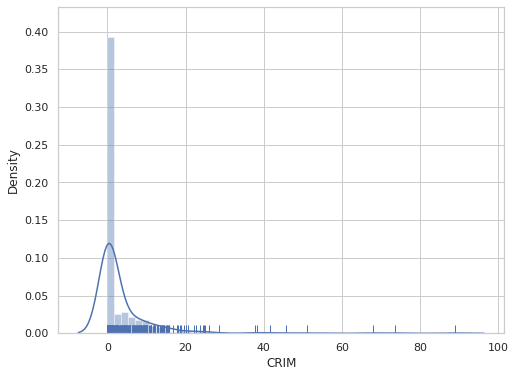

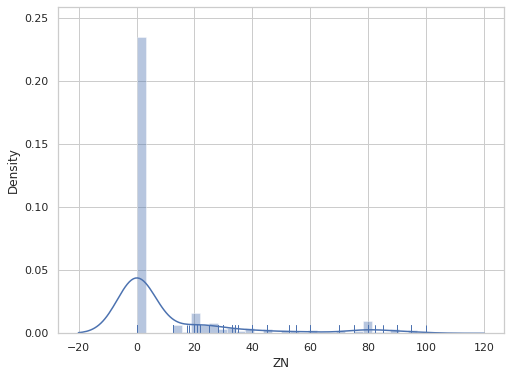

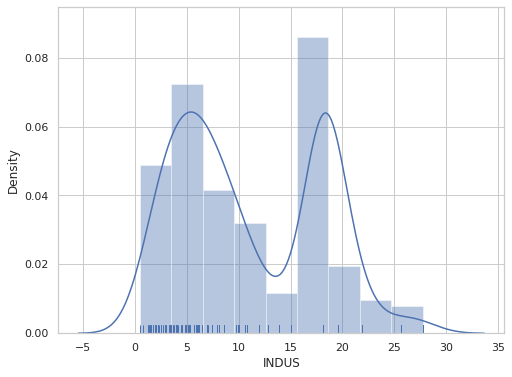

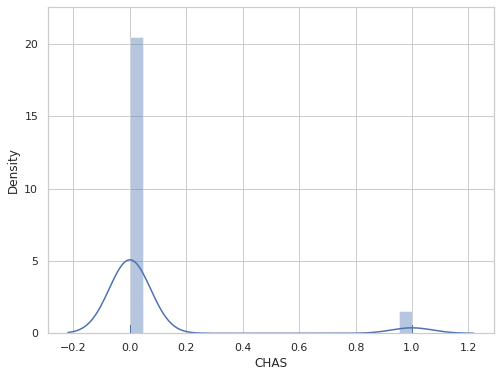

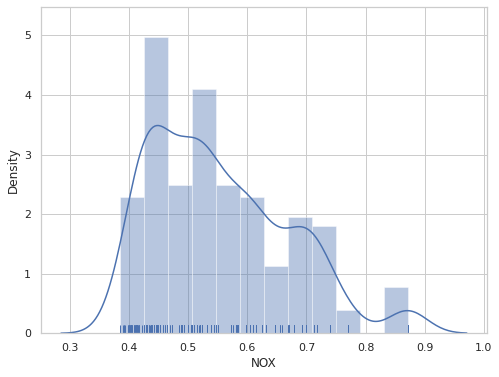

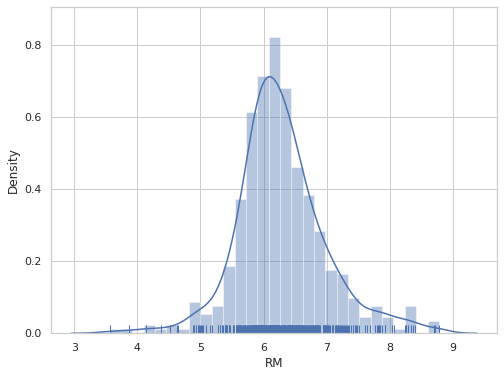

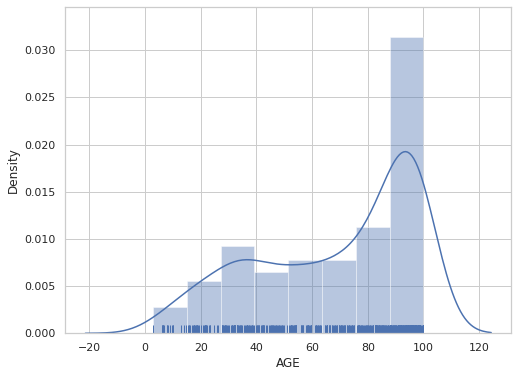

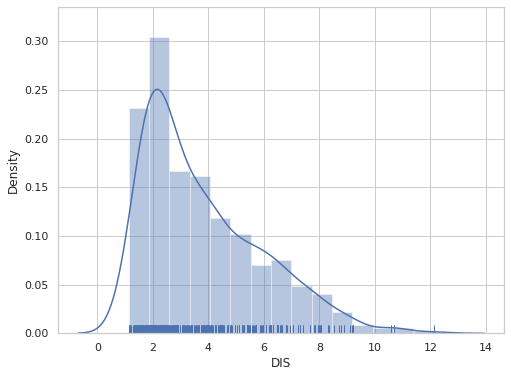

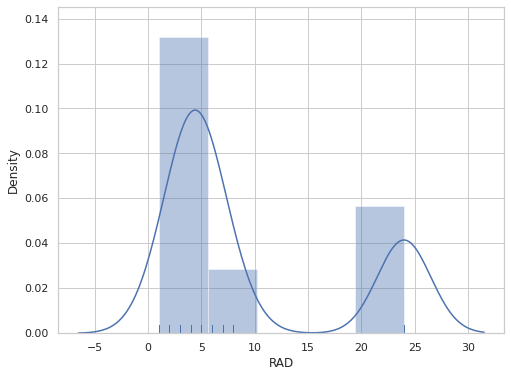

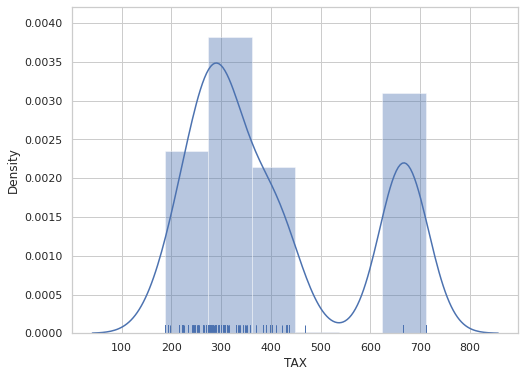

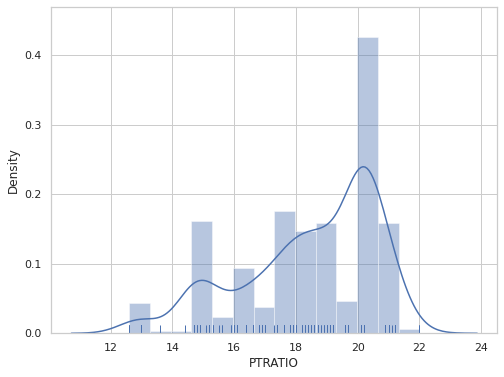

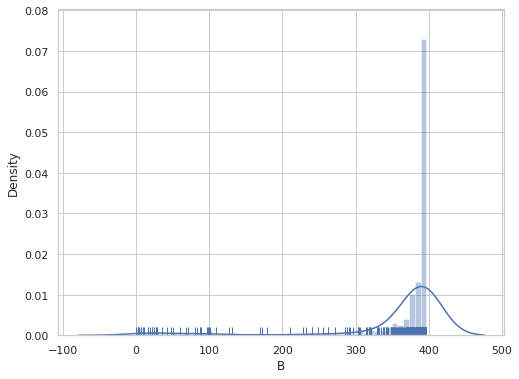

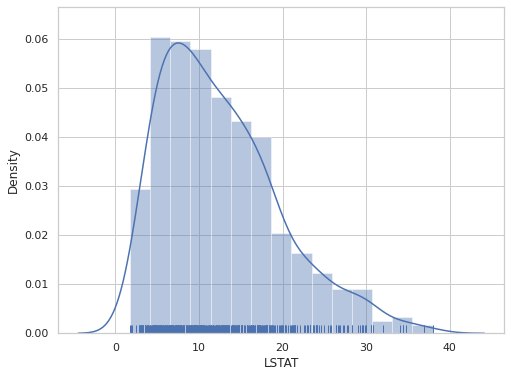

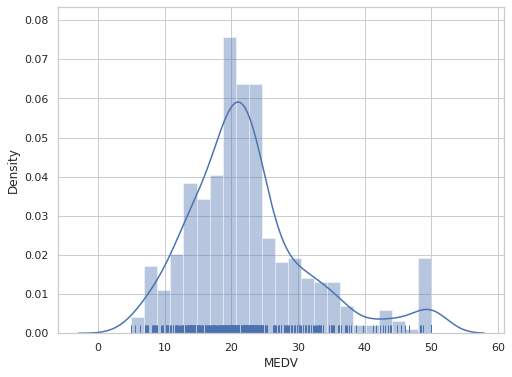

In [20]:
plt.figure(figsize=(8, 6))
sb.distplot(boston['CRIM'], rug = True)
plt.savefig('/content/crim.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['ZN'], rug = True)
plt.savefig('/content/zn.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['INDUS'], rug = True)
plt.savefig('/content/indus.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['CHAS'], rug = True)
plt.savefig('/content/chas.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['NOX'], rug = True)
plt.savefig('/content/nox.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['RM'], rug = True)
plt.savefig('/content/rm.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['AGE'], rug = True)
plt.savefig('/content/age.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['DIS'], rug = True)
plt.savefig('/content/dis.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['RAD'], rug = True)
plt.savefig('/content/rad.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['TAX'], rug = True)
plt.savefig('/content/tax.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['PTRATIO'], rug = True)
plt.savefig('/content/ptration.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['B'], rug = True)
plt.savefig('/content/b.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['LSTAT'], rug = True)
plt.savefig('/content/lstat.png')

plt.figure(figsize=(8, 6))
sb.distplot(boston['MEDV'], rug = True)
plt.savefig('/content/medv.png')

# Feature Observation

<Figure size 144x144 with 0 Axes>

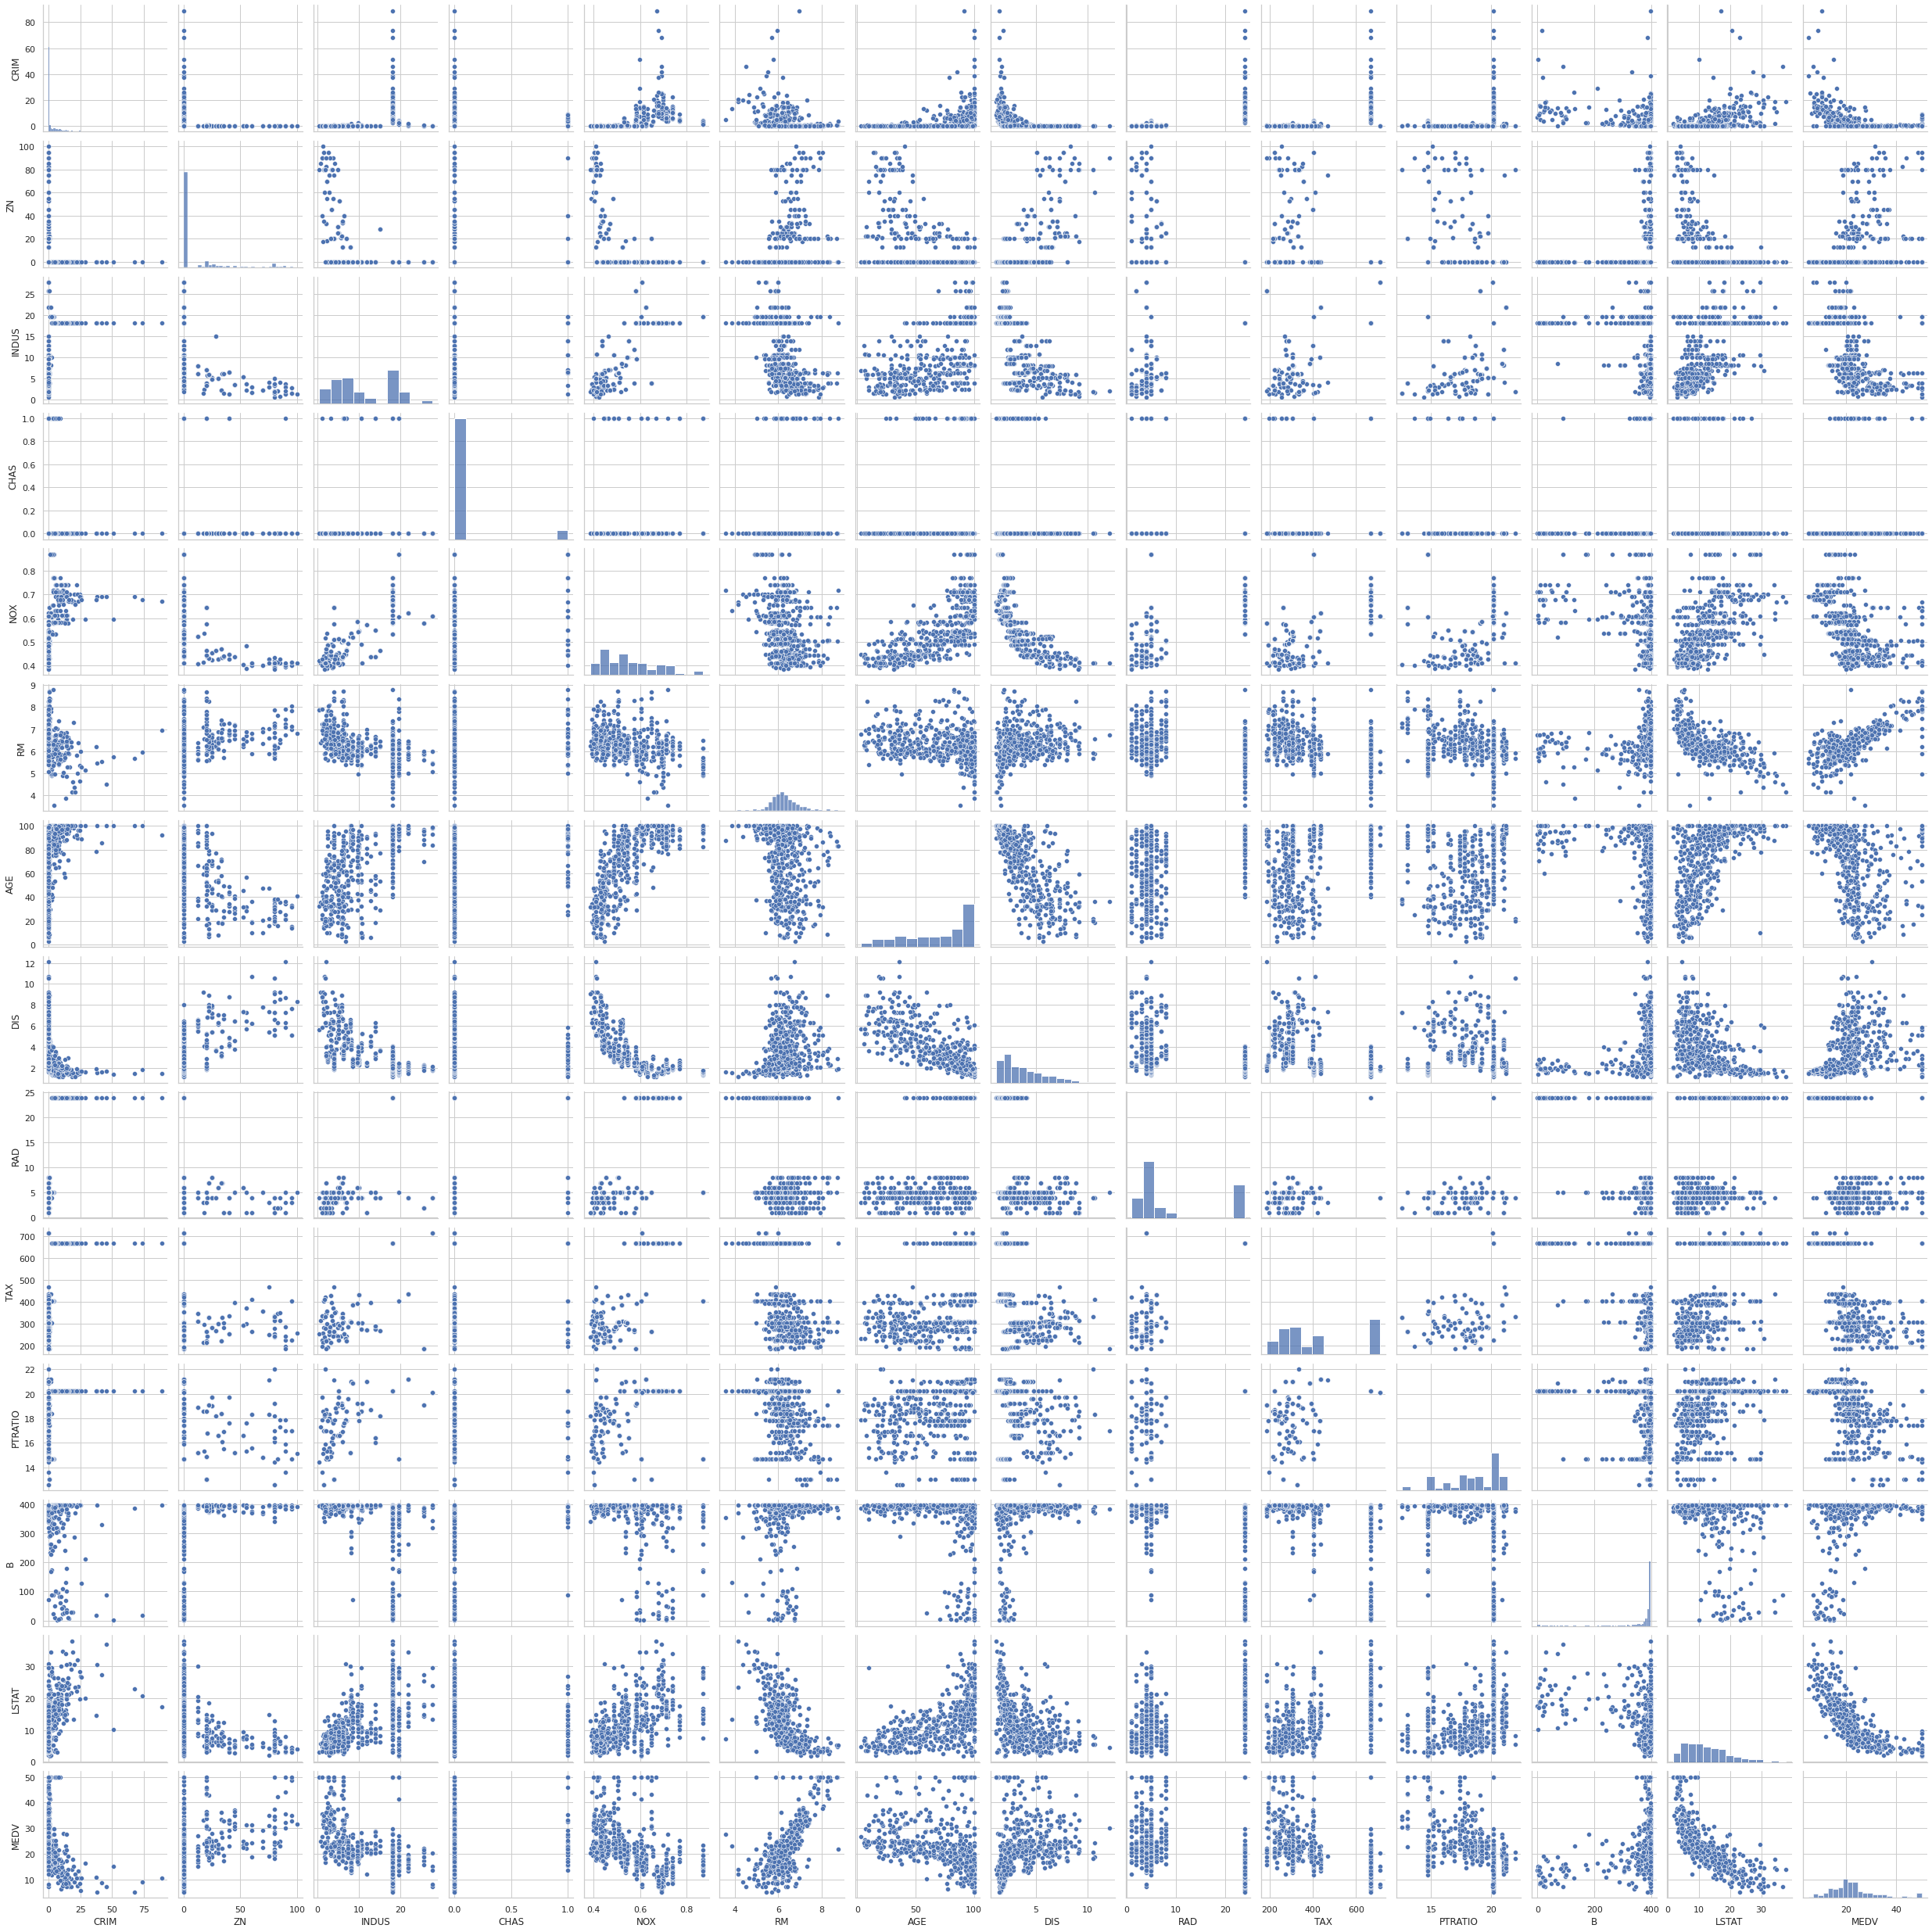

In [21]:
plt.figure(figsize  = (2, 2))
sb.pairplot(boston)
plt.savefig('/content/pairplot.png')

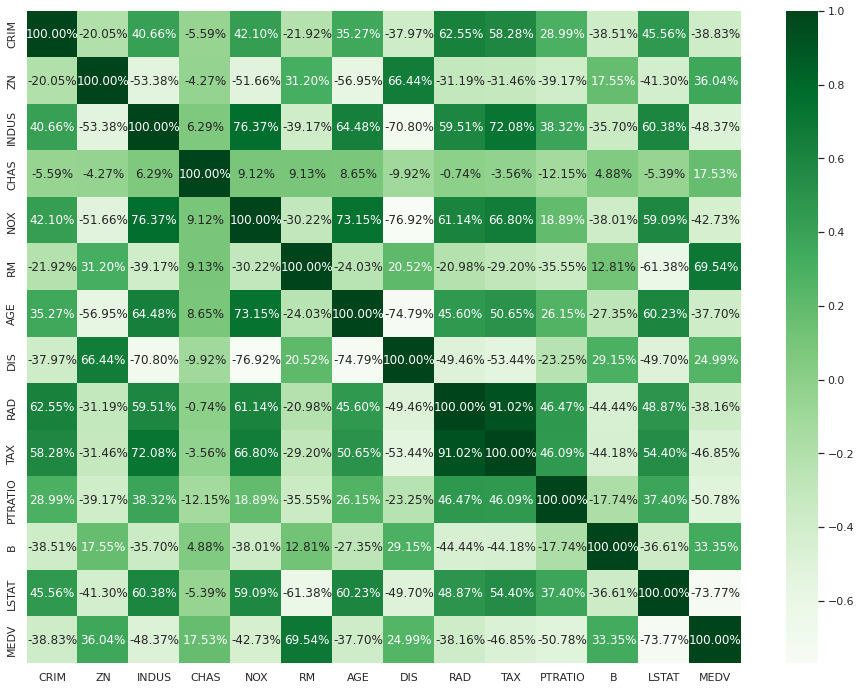

In [22]:
# TODO : Visualizing Feature Correlation
plt.figure(figsize = (16, 12))
sb.heatmap(boston.corr(), cmap = 'Greens', annot = True, fmt = '.2%')
plt.savefig('/content/features_correlation.png')

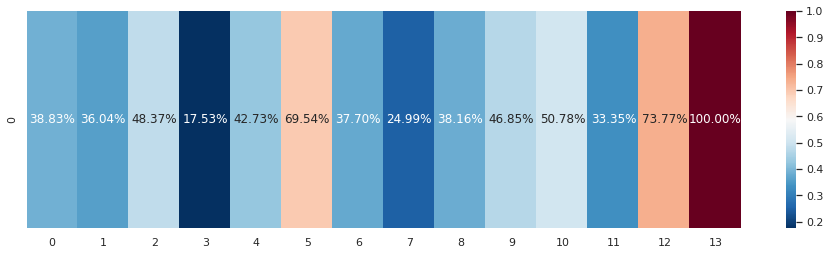

In [23]:
# TODO : Visualizing correlation of features with prediction column `MEDV`

corr_with_medv = boston.corrwith(boston['MEDV'])

plt.figure(figsize = (16, 4))
sb.heatmap([np.abs(corr_with_medv)], cmap = 'RdBu_r', annot = True, fmt = '.2%')
plt.savefig('/content/correlation_with_price.png')

In [24]:
# Let's see the features having more correlation
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

In [25]:
# Let's confirm this by using ExtraTreesRegressor
# TODO : To know the feature Importances
y = boston['MEDV'].values
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(boston.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = boston.columns[:-1])
important_features

Percentage Importance of each features with respect to House Price : 


CRIM        3.249635
ZN          0.496044
INDUS       3.202458
CHAS        1.391505
NOX         3.994421
RM         33.984957
AGE         1.960575
DIS         3.177528
RAD         2.117939
TAX         3.791076
PTRATIO     5.549684
B           1.907549
LSTAT      35.176630
dtype: float64

In [26]:
# Feature Impotances by ExtraTressRegressor
important_features.sort_values(ascending = False)

LSTAT      35.176630
RM         33.984957
PTRATIO     5.549684
NOX         3.994421
TAX         3.791076
CRIM        3.249635
INDUS       3.202458
DIS         3.177528
RAD         2.117939
AGE         1.960575
B           1.907549
CHAS        1.391505
ZN          0.496044
dtype: float64

In [27]:
# Feature Impotances by Correlation Matrix
corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

It says same approimately

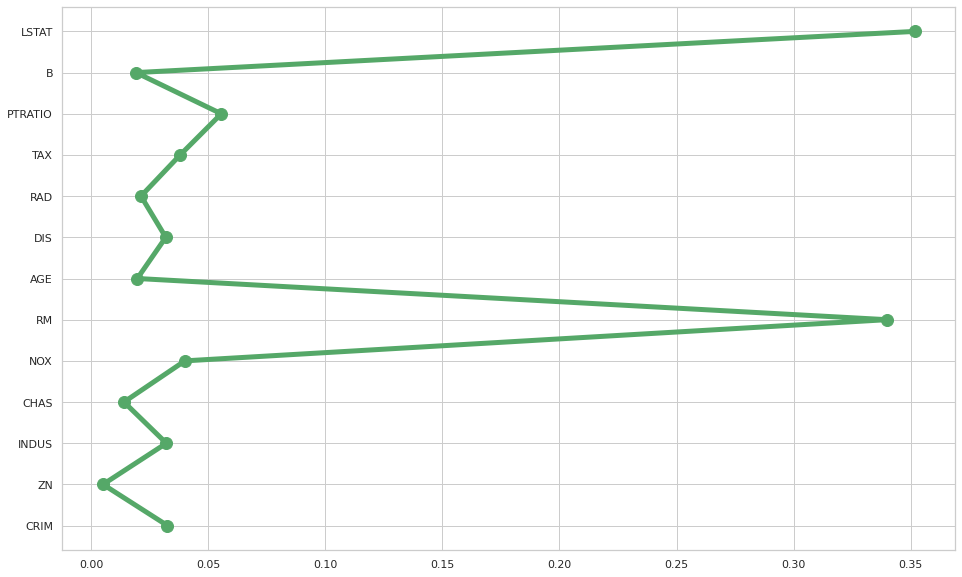

In [28]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, boston.columns[:-1], 'go-', linewidth=5, markersize=12)
plt.savefig('/content/feature_importances.png')

From the above feature observations, we found that some columns are most important such as LSTAT and RM

# Building Machine Learning Model

In [29]:
# Arranging features based on features importance
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'PTRATIO', 'NOX', 'TAX', 'CRIM', 'INDUS', 'DIS', 'RAD',
       'AGE', 'B', 'CHAS', 'ZN'],
      dtype='object')

In [30]:
y = boston.loc[:, 'MEDV'].values

In [31]:
# Arranging columns based on features importance
new_boston = boston[features_arranged_on_importance]
new_boston.head()

,LSTAT,RM,PTRATIO,NOX,TAX,CRIM,INDUS,DIS,RAD,AGE,B,CHAS,ZN
0,4.98,6.575,15.3,0.538,296.0,0.00632,2.31,4.0900,1,65.2,396.90,0,18.0
1,9.14,6.421,17.8,0.469,242.0,0.02731,7.07,4.9671,2,78.9,396.90,0,0.0
2,4.03,7.185,17.8,0.469,242.0,0.02729,7.07,4.9671,2,61.1,392.83,0,0.0
3,2.94,6.998,18.7,0.458,222.0,0.03237,2.18,6.0622,3,45.8,394.63,0,0.0
4,5.33,7.147,18.7,0.458,222.0,0.06905,2.18,6.0622,3,54.2,396.90,0,0.0


In [32]:
# Getting boston values
X = new_boston.values
X = X[:, :6]

# TODO : Splitting data as train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.6920835976561199
Testing Score  :  0.6182291928162132
R2 Score :  0.6182291928162132
MSE :  27.996697590957286


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linear_model = make_pipeline(MinMaxScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.6920835976561199
Testing Score  :  0.6182291928162134
R2 Score :  0.6182291928162134
MSE :  27.99669759095727


# Decision Tree Regression

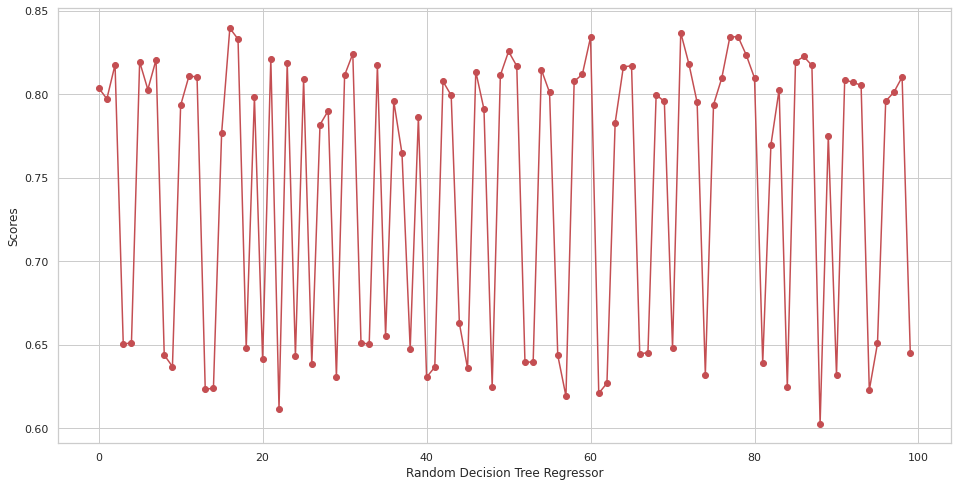

In [35]:
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(100):

    dtr_model = DecisionTreeRegressor(max_depth=None, random_state=i)
    dtr_model.fit(X_train, y_train)
    scores.append(r2_score(y_test, dtr_model.predict(X_test)))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Random Decision Tree Regressor')
plt.ylabel('Scores')
plt.savefig('/content/random_decision_tree_regressor.png')
plt.show()

See how the decision tree score changes for different random states

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train[:, :], y_train)
    

print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))

Training Score :  1.0
Testing Score  :  0.6504954593704129
R2 Score :  0.6504954593704129
MSE :  25.630490196078426


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
adtr_model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth = 12, random_state = 92))
adtr_model.fit(X_train, y_train)

print('Training Score : ', adtr_model.score(X_train, y_train))
print('Testing Score  : ', adtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, adtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, adtr_model.predict(X_test)))

Training Score :  0.9958285148214688
Testing Score  :  0.7857634675683157
R2 Score :  0.7857634675683157
MSE :  15.710775414364633


# Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)


print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))

Training Score :  0.9556678335291104
Testing Score  :  0.8753652262932305
R2 Score :  0.8753652262932305
MSE :  9.139939469248148


# Different Models Accuracy

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=23, random_state=3)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

print('k Neighbors Regression : ')
model4 = KNeighborsRegressor(n_neighbors = 10)
model4.fit(X_train, y_train)
print('Score : ', model4.score(X_test, y_test))

Linear Regression : 
Score :  0.6182291928162132
Decision Tree Regression : 
Score :  0.6504954593704129
Random Forest Regression : 
Score :  0.8753652262932305
k Neighbors Regression : 
Score :  0.5984820484743802


# Building optimal Random Regression Model

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 46)

print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, y))

Random Forest Regression : 
Score :  0.9465231142154287


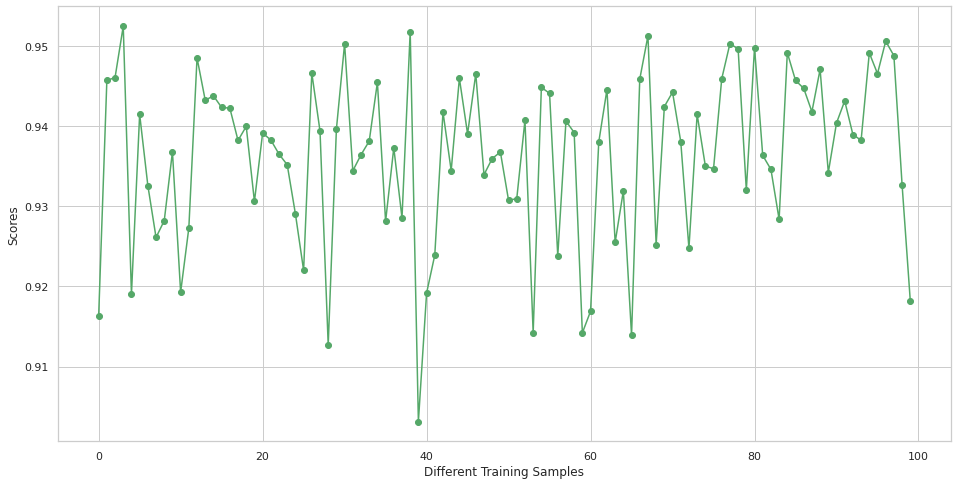

In [41]:
# Scores for different training samples
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'go-')
plt.xlabel('Different Training Samples')
plt.ylabel('Scores')
plt.savefig('/content/random_forest_diff_train_samples.png')
plt.show()

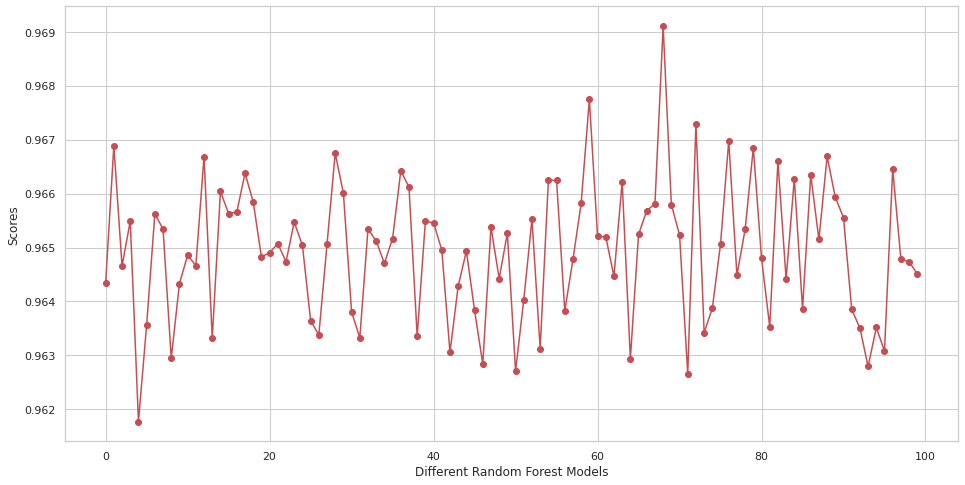

In [42]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(100):
    random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = i)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Different Random Forest Models')
plt.ylabel('Scores')
plt.savefig('/content/random_forest_diff_RF_models.png')
plt.show()

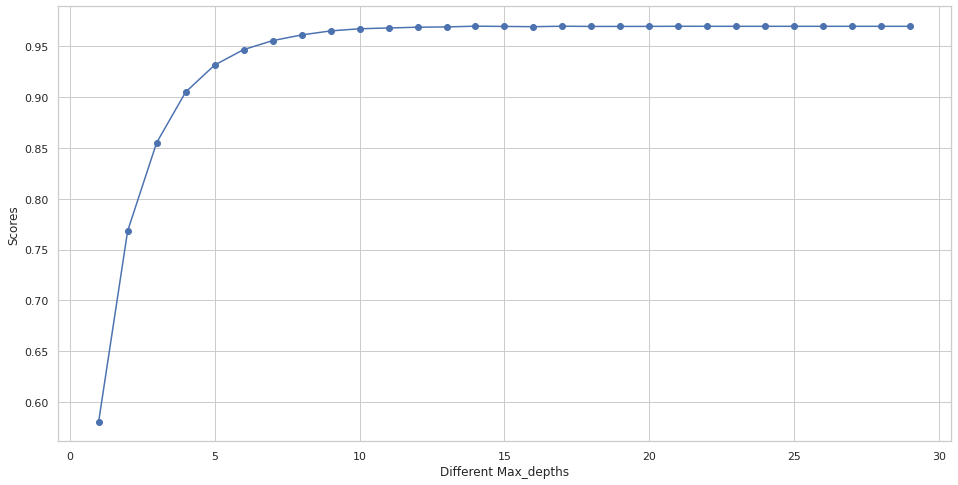

In [43]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(1, 30):
    random_forest_regressor = RandomForestRegressor(max_depth = i, random_state = 68)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.xlabel('Different Max_depths')
plt.ylabel('Scores')
plt.savefig('/content/random_forest_diff_max_depth.png')
plt.show()

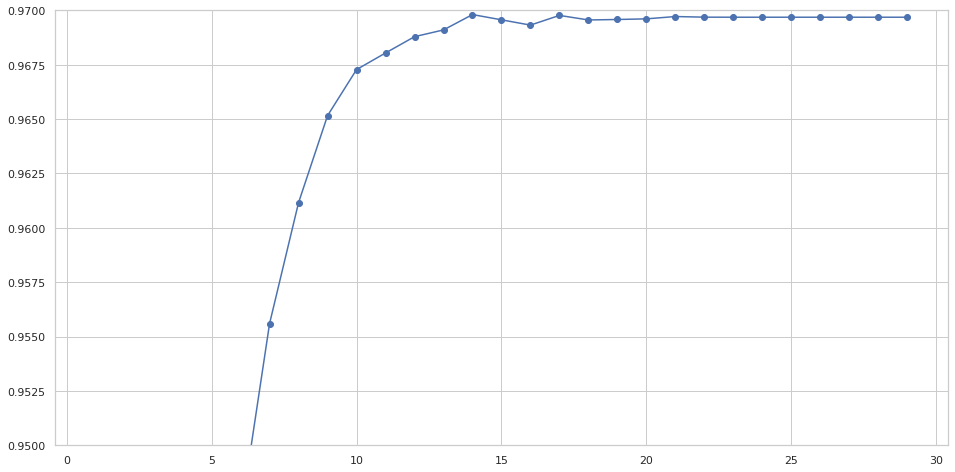

In [44]:
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.ylim(0.95, 0.97)
plt.show()

From this, we are going to choose,

1.random_state = 3, for choosing random Training samples

2.random_state = 68, for random Random forest regressor

3.max_depth = 13, for Max Depths in random forest regressor

# Building Optimal Model

In [45]:
# Choosing Optimal Training Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

# Building Optimal Random Forest regressor Model
random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = 68)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=68)

In [46]:
random_forest_regressor.score(X, y)

0.9691027770121023

In [47]:
print('Training Accuracy : ', random_forest_regressor.score(X_train, y_train))
print('Testing Accuracy  : ', random_forest_regressor.score(X_test, y_test))

Training Accuracy :  0.9800496881110853
Testing Accuracy  :  0.9246185226830361


In [48]:
print('Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test)))
print('Root Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test))**0.5)
print('Score : ', r2_score(y, random_forest_regressor.predict(X)))

Mean Squared Error :  6.2381793022291925
Root Mean Squared Error :  2.4976347415563374
Score :  0.9691027770121023


Finally We have built a Random Forest Regressor Model which performs well with top 6 features and having the Training accuracy of 97.89% and Testing accuracy of 96.73%.